In [187]:
#import

import numpy as np
from pandas import Series,DataFrame
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import tree

In [188]:
#read data

train = pd.read_csv("C:/Users/Mengyu/Desktop/study/machine learning/titanic/data/train.csv")
test = pd.read_csv("C:/Users/Mengyu/Desktop/study/machine learning/titanic/data/test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [189]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [190]:
train.info()
print('----------------------')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare      

In [191]:
#drop useless columns
#since cabin has too many nulls, we need to delete it
#Also drop passenger_id, ticket, name, and embarked since logically they are useless in prediction
#Fare is related to class, so we delete it
train_p = train.drop(["Cabin","PassengerId","Ticket","Name","Embarked","Fare"],axis=1)
test_p = test.drop(["Cabin","PassengerId","Ticket","Name","Embarked","Fare"],axis=1)
train_p.head()
train_p.info()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


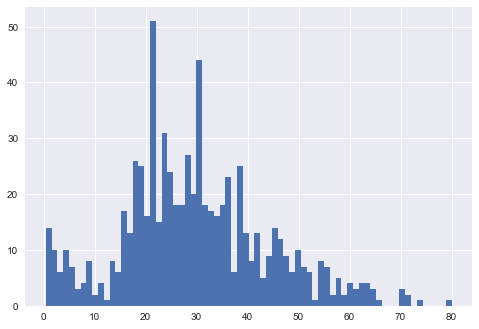

C:\Users\Mengyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Mengyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


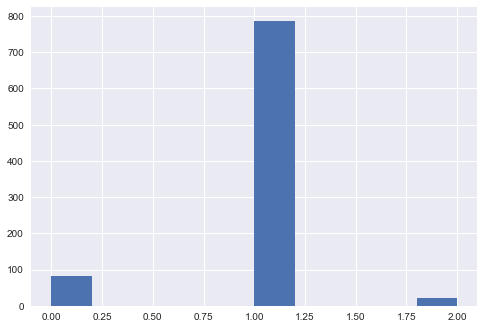

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
Age_new     891 non-null int32
Family      891 non-null int64
Gender      891 non-null int64
dtypes: float64(1), int32(1), int64(4), object(1)
memory usage: 45.3+ KB


C:\Users\Mengyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Mengyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


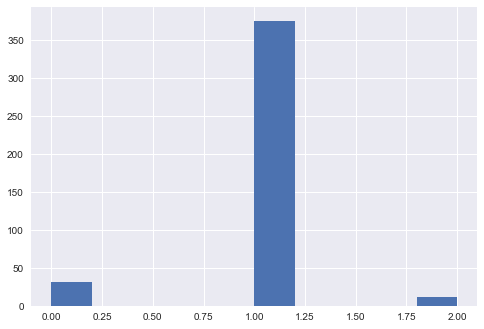

In [199]:
#Age
#Logically, when accidents occur, we normally give priority to children and old people. 
#Therefore, I divide age into 3 groups:(,16),(16,60),(60,) to represent child, adult and old
#since most passengers are adults, we fill nulls with adult
#0:child;1:adult,2:old
train_p['Age'].dropna().hist(bins=70)
plt.show()

train_p['Age_new'] = 1
train_p['Age_new'][train_p["Age"]<16] = 0
train_p['Age_new'][train_p["Age"]>60] = 2
train_p['Age_new']=train_p['Age_new'].astype(int)
train_p['Age_new'].hist()
plt.show()        
train_p.info()

test_p['Age_new'] = 1
test_p['Age_new'][test_p["Age"]<16] = 0
test_p['Age_new'][test_p["Age"]>60] = 2
test_p['Age_new']=test_p['Age_new'].astype(int)
test_p['Age_new'].hist()
plt.show()

In [193]:
#Family

#Referrence:https://www.kaggle.com/omarelgabry/a-journey-through-titanic
# Instead of having two columns Parch & SibSp, 
# we can have only one column to represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
train_p['Family'] =  train_p["Parch"] + train_p["SibSp"]
train_p['Family'].loc[train_p['Family'] > 0] = 1
train_p['Family'].loc[train_p['Family'] == 0] = 0

test_p['Family'] =  test_p["Parch"] + test_p["SibSp"]
test_p['Family'].loc[test_p['Family'] > 0] = 1
test_p['Family'].loc[test_p['Family'] == 0] = 0


# drop Parch & SibSp
train_p = train_p.drop(['SibSp','Parch'], axis=1)
test_p    = test_p.drop(['SibSp','Parch'], axis=1)



C:\Users\Mengyu\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [194]:
#gender
#male is 1
train_p['Gender'] = 0
train_p['Gender'][train_p['Sex']=="male"] = 1

test_p['Gender'] = 0
test_p['Gender'][test_p['Sex']=="male"] = 1


C:\Users\Mengyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Mengyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [195]:
#final data preparation
train_y = train_p['Survived']
train_x = train_p.drop(['Survived','Age',"Sex"],axis=1)

test_x = test_p.drop(['Age','Sex'],axis=1)

train_y.head()
train_x.head()
test_x.head()
train_x.info()


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

,Pclass,Age_new,Family,Gender
0,3,1,1,1
1,1,1,1,0
2,3,1,0,0
3,1,1,1,0
4,3,1,0,1


,Pclass,Age_new,Family,Gender
0,3,1,0,1
1,3,1,1,0
2,2,2,0,1
3,3,1,0,1
4,3,1,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Pclass     891 non-null int64
Age_new    891 non-null int32
Family     891 non-null int64
Gender     891 non-null int64
dtypes: int32(1), int64(3)
memory usage: 24.4 KB


In [196]:
#decision tree model
model_tree = tree.DecisionTreeClassifier()
model_tree = model_tree.fit(train_x, train_y)

print(model_tree.feature_importances_)
print(model_tree.score(train_x, train_y))

[ 0.24949133  0.08455378  0.01735779  0.6485971 ]
0.81593714927


In [197]:
#predict
a = model_tree.predict(test_x)

test_x["Survived"] = a



In [198]:
test_data = test_x
test_data.head()

,Pclass,Age_new,Family,Gender,Survived
0,3,1,0,1,0
1,3,1,1,0,0
2,2,2,0,1,0
3,3,1,0,1,0
4,3,1,1,0,0
